<a href="https://colab.research.google.com/github/MurugeshToram/Dominos-Case-Study/blob/main/dominos_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement 🍕
Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos.
Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business.

Help Kanav by analyzing the data and sharing insights to keep his business up and running



In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/diminos_data.csv')

In [ ]:
df.shape

(15000, 3)

In [ ]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [ ]:
# Looking for null values
# checking data types of columns/features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [ ]:
#Typecasting of columns


df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])


df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [ ]:
#Checking whether datatypes have changed or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [ ]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [ ]:
df['order_placed_at'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [ ]:
df['order_placed_at'].dt.month

0        3
1        3
2        3
3        3
4        3
        ..
14995    3
14996    3
14997    3
14998    3
14999    3
Name: order_placed_at, Length: 15000, dtype: int64

In [ ]:
df['order_placed_at'].dt.year

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
14995    2023
14996    2023
14997    2023
14998    2023
14999    2023
Name: order_placed_at, Length: 15000, dtype: int64

In [ ]:
df['order_placed_at'].dt.week

<ipython-input-19-51c4500d8237>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['order_placed_at'].dt.week


0         9
1         9
2         9
3         9
4         9
         ..
14995    13
14996    13
14997    13
14998    13
14999    13
Name: order_placed_at, Length: 15000, dtype: int64

In [ ]:
df['order_placed_at'].dt.week -8

<ipython-input-20-7c4906e02fba>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['order_placed_at'].dt.week -8


0        1
1        1
2        1
3        1
4        1
        ..
14995    5
14996    5
14997    5
14998    5
14999    5
Name: order_placed_at, Length: 15000, dtype: int64

In [ ]:
#Day of week
df['order_placed_at'].dt.dayofweek

0        2
1        2
2        2
3        2
4        2
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: order_placed_at, Length: 15000, dtype: int64

In [ ]:
#Mappping day num to name
#Adding new column

df['day_of_month'] = df['order_placed_at'].dt.day

df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1


In [ ]:
#adding new column  day


df['day_of_week'] = df['order_placed_at'].dt.day_name()


df.head()


,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday


In [ ]:
df['day_of_month'].value_counts()

20    597
22    591
2     588
10    587
23    583
6     582
12    582
8     578
7     570
4     567
24    565
9     564
18    559
27    551
5     551
1     550
25    547
16    545
15    540
17    537
11    536
3     534
26    532
19    526
13    526
21    520
14    492
Name: day_of_month, dtype: int64

<Axes: >

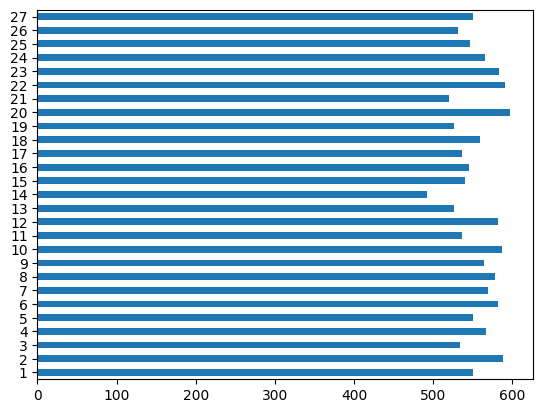

In [ ]:
df['day_of_month'].value_counts().sort_index().plot(kind='barh')

<Axes: >

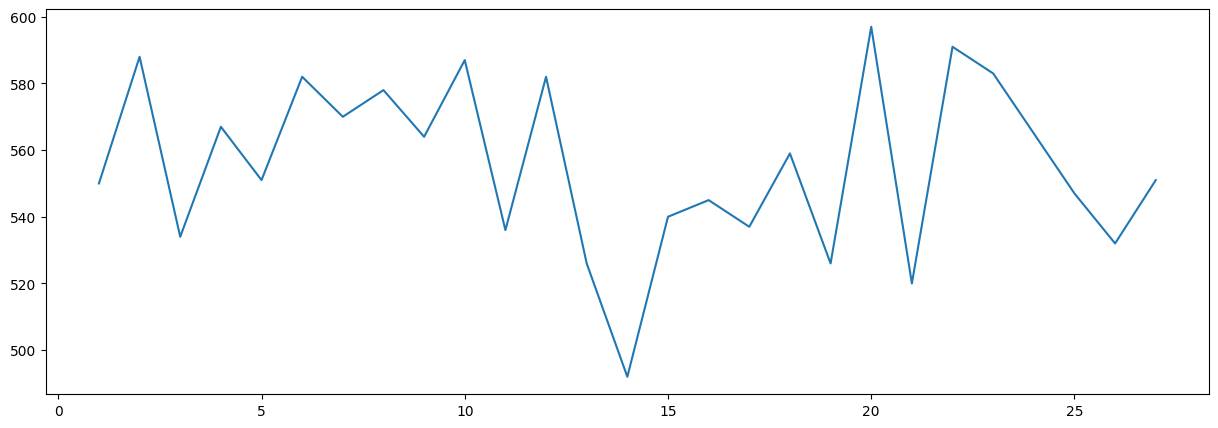

In [ ]:
df['day_of_month'].value_counts().sort_index().plot(kind='line', figsize =(15,5))

In [ ]:
df['day_of_week'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: day_of_week, dtype: int64

<Axes: >

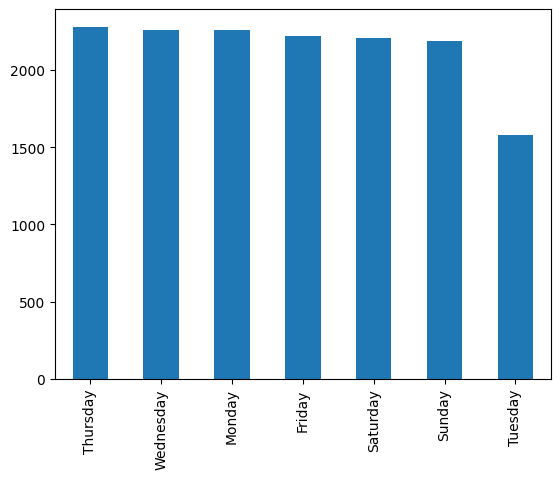

In [ ]:
df['day_of_week'].value_counts().plot(kind = 'bar')

In [ ]:
#there are 4 wed thus fri sat sun but there are only 3 tuesdays in that month
#its not that tues day has less no of orders

In [ ]:
df['delivery_time']   =  df['order_delivered_at'] - df['order_placed_at']

df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,0 days 00:16:10.619056


In [ ]:
df['delivery_time']   = df['delivery_time'].dt.total_seconds() /60


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   day_of_month        15000 non-null  int64         
 4   day_of_week         15000 non-null  object        
 5   delivery_time       15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 703.2+ KB


In [ ]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984


In [ ]:
df['delivery_time'].mean()

20.499389326467778

In [ ]:
df['delivery_time'].median()

15.797986066666667

In [ ]:
df['delivery_time'].std()

96.16036180216477

In [ ]:
df['delivery_time'].quantile(0.25)

15.274825995833332

<Axes: >

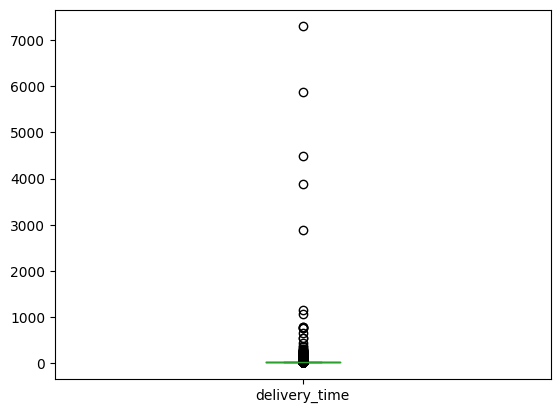

In [ ]:
df['delivery_time'].plot(kind='box')

<Axes: >

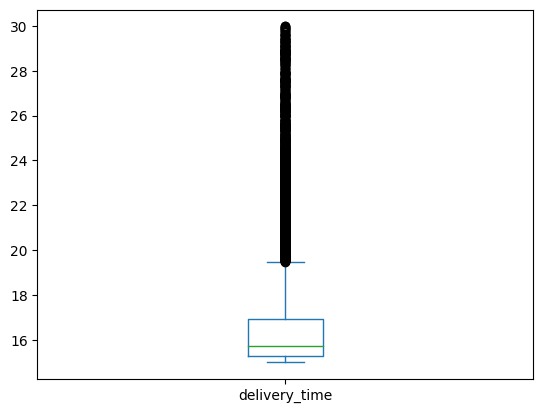

In [ ]:
df = df[df['delivery_time'] < 30]
df['delivery_time'].plot(kind='box')



In [ ]:
df['delivery_time'].quantile(0.95)

21.919544133333332

In [ ]:
df.shape

(14396, 6)